In [1]:
import os
import matplotlib.pyplot as plt
import cv2

## Preprocess Visualization

Visualize Preprocessings? y
(64, 64, 3)


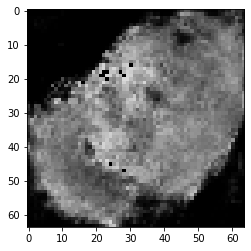

In [5]:
vp = str(input("Visualize Preprocessings? "))

if vp.upper() == 'Y':
    leukocyte = '/mnt/d4f6e37f-b51e-4cce-9bf9-bf48e0de6271/Health/Leukomia/splitted_aug/leukocyte/gan/0/0000.png'        

    leukocyte_img = cv2.imread(leukocyte)
    
    gray = cv2.cvtColor(leukocyte_img, cv2.COLOR_BGR2GRAY)
    
    ret, thresh_gray = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)
    gray[thresh_gray == 255] = 0
    
    bbox = cv2.boundingRect(gray)
    x, y, w, h = bbox
    foreground = leukocyte_img[y:y+h, x:x+w]
    
    ret, thresh_foreground = cv2.threshold(foreground, 220, 255, cv2.THRESH_BINARY)
    foreground[thresh_foreground == 255] = 0
    
    res = cv2.resize(foreground, (64, 64))
    
    plt.imshow(res)
    print(res.shape)
else:
    pass

## Preprocess All

In [3]:
processed = str(input("classify train dir: "))
processed = os.path.join(processed, 'classify train')

classify train dir: /mnt/d4f6e37f-b51e-4cce-9bf9-bf48e0de6271/Health/Leukomia/splitted_aug/leukocyte


In [4]:
h = int(input("Required Size: "))
w = h

for folder_name in os.listdir(processed):
    folder = os.path.join(processed,folder_name)
    for classes_name in os.listdir(folder):
        classes = os.path.join(folder, classes_name)
        for file_name in os.listdir(classes):
            file = os.path.join(classes, file_name)
            img = cv2.imread(file)
            if img.shape[0] < h or img.shape[1] < w:
                os.remove(file)
            else:
                res = cv2.resize(img, (h, w))
                cv2.imwrite(file, res)

Required Size: 64


In [5]:
res.shape

(64, 64, 3)

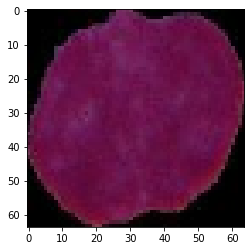

In [6]:
plt.imshow(res)